In [1]:
from classifier import load_data, classify, test

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
ratios = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

In [3]:
# RF-testing
accuracies = []
F2_scores = []
AUC_scores = []
times = []
_, X_test, _, y_test = load_data(0.9, 500000, downscale=False, idx=(3,))
for ratio in ratios:
    X_train, _, y_train, _ = load_data(0.1, int(100000/ratio), anomalous_ratio=ratio, idx=(0,1,2))
    cf, t = classify("rf", X_train, y_train)
    times.append(t)
    acc = test(cf, X_test, y_test, "acc")
    F2 = test(cf, X_test, y_test, "f2")
    AUC = test(cf, X_test, y_test, "auc")
    accuracies.append(acc)
    F2_scores.append(F2)
    AUC_scores.append(AUC)

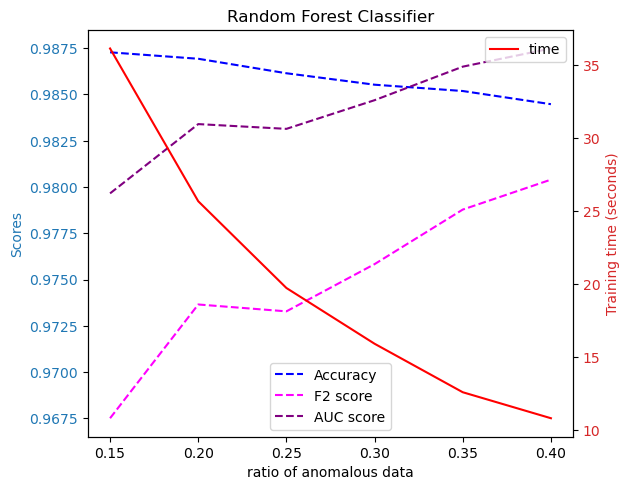

In [4]:
fig, ax1 = plt.subplots()
ax1.plot(ratios, accuracies, linestyle="dashed", label="Accuracy", color='blue')
ax1.plot(ratios, F2_scores, linestyle="dashed", label="F2 score", color='magenta')
ax1.plot(ratios, AUC_scores, linestyle="dashed", label="AUC score", color='purple')

color = 'tab:blue'
ax1.set_xlabel('ratio of anomalous data')
ax1.set_ylabel('Scores', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Training time (seconds)', color=color)  
ax2.plot(ratios, times, label="time", color="red")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
ax1.legend(loc="lower center")
ax2.legend()
plt.title("Random Forest Classifier")
plt.show()